In [11]:
import numpy as np
import math
import tensorflow as tf

In [18]:
from matplotlib import pyplot

In [12]:
def objective_fx(x, noise = 0.1):
    noise = np.random.normal(loc =0, scale = noise)
    return(x**2 * math.sin(5* math.pi * x)** 6.0) + noise

In [7]:
# grid based sample of the domain [0,1]
X = np.arange(0, 1, 0.01)

In [14]:
#sample the domain without noise
y = [objective_fx(x, 0) for x in X]

#sample the domain with noise
y_noise = [objective_fx(x) for x in X]

In [16]:
# Find best result
ix = np.argmax(y)

print('Optima: x=%.3f, y=%.3f' % (X[ix], y[ix]))

Optima: x=0.900, y=0.810


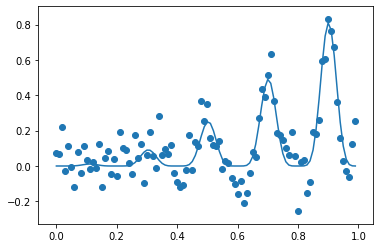

In [20]:
# plot the points with noise
pyplot.scatter(X, y_noise)
# plot the points without noise
pyplot.plot(X, y)
# show the plot
pyplot.show()

In [21]:
# Import sklearn's Gaussian Process
from sklearn.gaussian_process import GaussianProcessRegressor

In [22]:
#Approximation for the objective function
def surrogate(model, X):
    return model.predict(X, return_std =  True)

In [36]:
# plot real observations vs surrogate function
def plot(X, y, model):
    # scatter plot of inputs and real objective function
    pyplot.scatter(X, y)
    # line plot of surrogate function across domain
    Xsamples = np.asarray(np.arange(0, 1, 0.001))
    Xsamples = Xsamples.reshape(len(Xsamples), 1)
    ysamples, _ = surrogate(model, Xsamples)
    pyplot.plot(Xsamples, ysamples)
    # show the plot
    pyplot.show()

In [32]:
#Sample the domain sparsely with noise
X = np.random.random(100)
y = np.asarray([objective_fx(x) for x in X])
#Reshape into rows 
X= X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
#Define the model
model = GaussianProcessRegressor()
#FIt the model
model.fit(X,y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [38]:
 mu, std = surrogate(model, X)

C:\Users\higgleop\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:362: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


C:\Users\higgleop\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:362: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


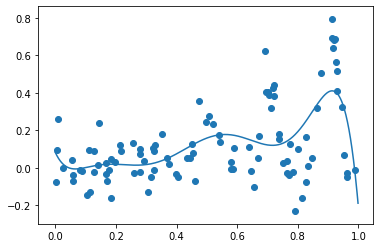

In [37]:
#plot the surrogate function
plot(X,y,model)

In [ ]:
def acquisition(X, X_samples, model):
    yhat, _ = surrogate(model, X)
    best = max(yhat)
    mu, std = surrogate(model, X_samples)
    